In [82]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import torch.distributions as dist

# Situation
Let's model the number of likes for a video.  
It's a binary situation (like [1] or no like[0])  
So we use a beta distribution to model our parameter.  
  
Let's say we have 2000 views, and 400 like then:

## Generate data

Let's generate data for today. Today we have 2000 views and the like rate is 30%.  
We want to use this data, together with the data of the day before.

In [83]:
N = 2000
like_prob = 0.3
bern = dist.Bernoulli(probs=like_prob)
D = bern.sample((N,)).detach().numpy()

# Prior

Let's choose a prior. Let's say that the previous day we had 2000 views, of which 400 liked the video.

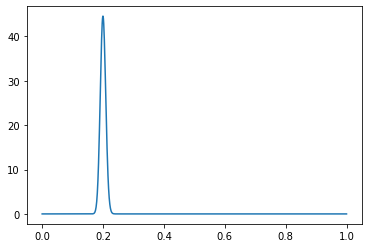

In [84]:
a = 400
b = N - a

# domain
theta_range = np.linspace(0, 1, 1000)

# prior distribution p(theta)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

plt.plot(theta_range, prior)

We see the spike at 0.2, becuase 400/2000 = 0.2

# Likelihood

We need to choose probability model for $ p(D|\theta) $, the probability of seeing the data $D$ given a particular $\theta$. Likelihood is also called the **sampling distribution**.  
The likelihood is a bernoulli because the $D$ is binary.

In [85]:
likelihood = stats.binom.pmf(k = np.sum(D), n = len(D), p = a/(a+b))
likelihood


4.708115010650962e-29

Let's see for all possible $\theta$'s (marginalize)

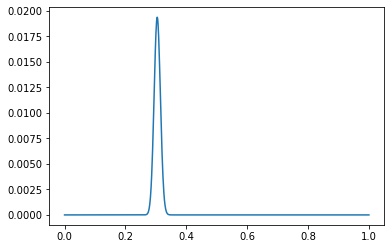

In [86]:
likelihood = stats.binom.pmf(k=np.sum(D), n=len(D), p=theta_range )
plt.plot(theta_range, likelihood)

# Posterior

The 2000 data points are now encoded in on scaler - the likelihood (sampling distribution).  
Remember $p(\theta|D) \propto p(\theta) * p(D|\theta)$

In [87]:
prior = stats.beta.pdf(x=theta_range, a=a, b=b)

likelihood = stats.binom.pmf(k=np.sum(D), n=len(D), p=theta_range)

posterior = likelihood*prior
normalized_posterior = posterior / np.sum(posterior)

In [88]:
np.argmax(prior)

200

In [89]:
np.argmax(likelihood)

304

In [90]:
np.argmax(posterior)

252

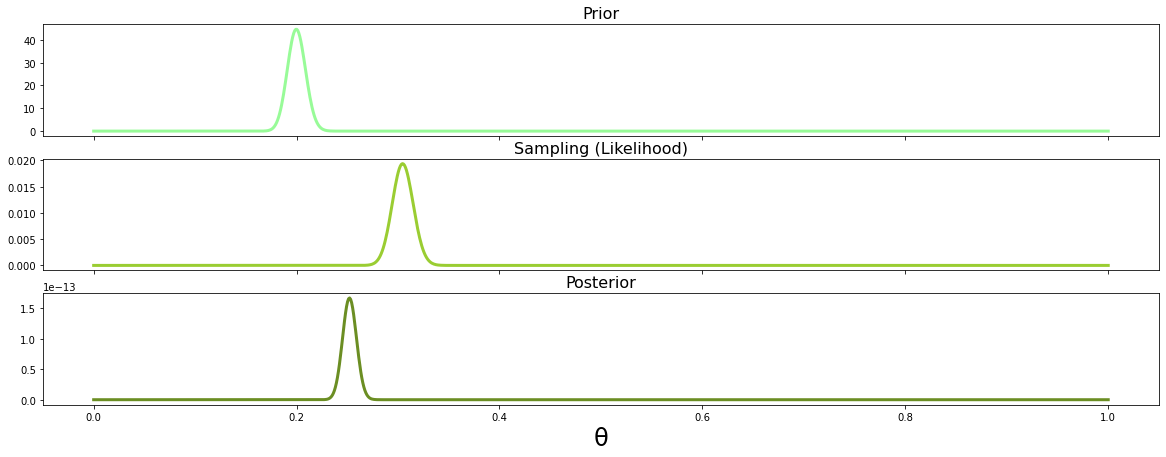

In [91]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)

axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)

axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)

axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()


As you can see our prior (the day before) we had 0.2 like ratio.  
Today we sampled (likelihood) 0.3 like ratio.  
We update our beliefe by encoding it in the posterior.  
The prior of the next day will thus have a like ratio of 0.25.  
Also, as the variance decreased with in the posterior,  
this is due to the fact that we have more data.